The flowers dataset consists of images of flowers with 5 possible class labels.

When training a machine learning model, we split our data into training and test datasets. We will train the model on our training data and then evaluate how well the model performs on data it has never seen - the test set.

Let's download our training and test examples (it may take a while) and split them into train and test sets.

Run the following two cells:

In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE = 256
BATCH_SIZE = 50
CHANNELS = 3

In [1]:
# !unzip '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/Flower Dataset.zip'

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\kisha\Downloads\MyDataset\MyDataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 30293 files belonging to 25 classes.


In [10]:
class_name = train_ds.class_names
class_name

['Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)_Common_rust',
 'Corn_(maize)_Northern_Leaf_Blight',
 'Corn_(maize)_healthy',
 'Cotton_leaf_diseased',
 'Cotton_leaf_fresh',
 'Orange_Haunglongbing_(Citrus_greening)',
 'Orange__Black_Rot',
 'Orange__Canker',
 'Orange__Healthy',
 'Pepper,_bell_Bacterial_spot',
 'Pepper,_bell_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Random',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Tomato_mosaic_virus',
 'Tomato_healthy',
 'Wheat_healthy',
 'Wheat_leaf_rust',
 'Wheat_nitrogen_deficiency']

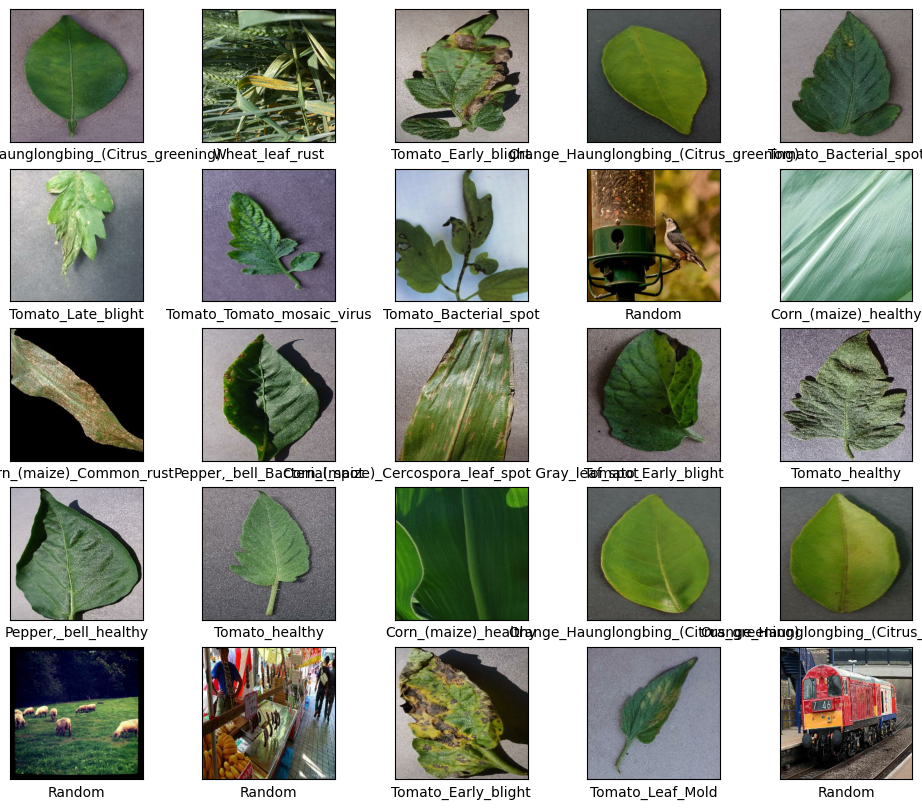

In [13]:
plt.figure(figsize = (12,10) )
for image_batch, label_batch in train_ds.take(1):
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    # plt.title(class_name[label_batch[i]])
    plt.xlabel(class_name[label_batch[i]])
    # plt.axis('off')
    plt.xticks([])
    plt.yticks([])


In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_name)
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])


model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (50, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (50, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (50, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (50, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (50, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (50, 62, 62, 64)          0         
 g2D)                                                 

In [19]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    # epochs = 70,
    epochs = 5,
    batch_size = BATCH_SIZE,
    verbose = 1
)

Epoch 1/5
606/606 [==============================] - 1044s 2s/step - loss: 1.6153 - accuracy: 0.5170
Epoch 2/5
606/606 [==============================] - 1032s 2s/step - loss: 0.8026 - accuracy: 0.7560
Epoch 3/5
606/606 [==============================] - 1033s 2s/step - loss: 0.5869 - accuracy: 0.8166
Epoch 4/5
606/606 [==============================] - 1017s 2s/step - loss: 0.4959 - accuracy: 0.8451
Epoch 5/5
606/606 [==============================] - 1004s 2s/step - loss: 0.4307 - accuracy: 0.8646


### Save Model

In [25]:
model_json = model.to_json()
with open("agri_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("agri_model.h5")
print("Saved model to disk")

Saved model to disk


### Model Testing

In [24]:
# '''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image

ImagePath = r"C:\Users\kisha\Downloads\MyDataset\MyDataset\Orange__Canker\Orange_Canker53.png"
test_image = image.load_img(ImagePath,target_size = (256, 256))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis=0)

result = model.predict(test_image,verbose=0)

# print(training_set.class_indices)

print('####'*10)

print(np.argmax(result))
print('Prediction is: ',class_name[np.argmax(result)])

########################################
8
Prediction is:  Orange__Canker


In [3]:
# '''########### Making single predictions ###########'''
# import numpy as np
# from tensorflow.keras.preprocessing import image

# ImagePath = '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/tulip.jpg'
# test_image = image.load_img(ImagePath,target_size = (256, 256))
# test_image = image.img_to_array(test_image)

# test_image = np.expand_dims(test_image,axis = 0)

# result = model.predict(test_image,verbose = 0)

# # print(training_set.class_indices)

# print('####'*10)

# print(np.argmax(result))
# print('Prediction is: ',class_name[np.argmax(result)])

In [4]:
# def model_predict(x):
#   import numpy as np
#   from tensorflow.keras.preprocessing import image

#   ImagePath = x
#   test_image = image.load_img(ImagePath,target_size = (256, 256))
#   test_image = image.img_to_array(test_image)

#   test_image = np.expand_dims(test_image,axis = 0)

#   result = model.predict(test_image,verbose = 0)

#   print('####'*10)

#   return class_name[np.argmax(result)]

In [5]:
# testing = ['/content/drive/MyDrive/Data-Science Edureka/Project/Flower/daisy.jpeg',
#            '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/rose.jpg',
#            '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/sunflower.jpeg',
#            '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/dandelion.jpg',
#            '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/IMG20230328201602.jpg',
#            '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/tulip.jpg',
#            '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/red-roses.jpg']

# for i in testing:
#   print(model_predict(i))